In [1]:
%matplotlib notebook
from gamesopt.executor import SlurmExecutor, SlurmConfig, default_config
from gamesopt.train_distributed import train, TrainDistributedConfig
from gamesopt.games import load_game, GameOptions, QuadraticGameConfig, GameOptions, GameType
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.quantization import QuantizationOptions, QuantizationType
from gamesopt.db import Database, Record
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
from pathlib import Path
import os

Couldn't import submitit. Install it if you plan on running this code on the cluster.


In [2]:
PATH = Path("./models/distributed_quadratic")

options = QuadraticGameConfig(num_samples = 10, dim = 10)
game_conf = GameOptions(game_type = GameType.QUADRATIC, quadratic_options=options)
game = GameOptions(game_type = GameType.QUADRATIC, quadratic_options=options)

# Compute Solution

In [10]:
config = TrainDistributedConfig(game = game, num_iter = 30, save_file=PATH, n_process=5)

Trying port 46846
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...


<IPython.core.display.Javascript object>


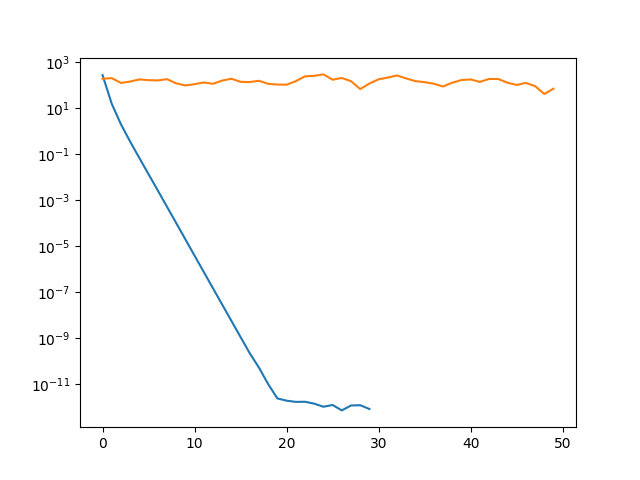

In [11]:
config.optimizer = OptimizerOptions(optimizer_type = OptimizerType.QSGDA, lr=1., full_batch=True)
record = train(config)
plt.figure()
plt.plot(record.metrics.hamiltonian)
plt.yscale("log")

In [23]:
config = TrainDistributedConfig(game = game, num_iter = 200, load_file=PATH, n_process=5)

<IPython.core.display.Javascript object>


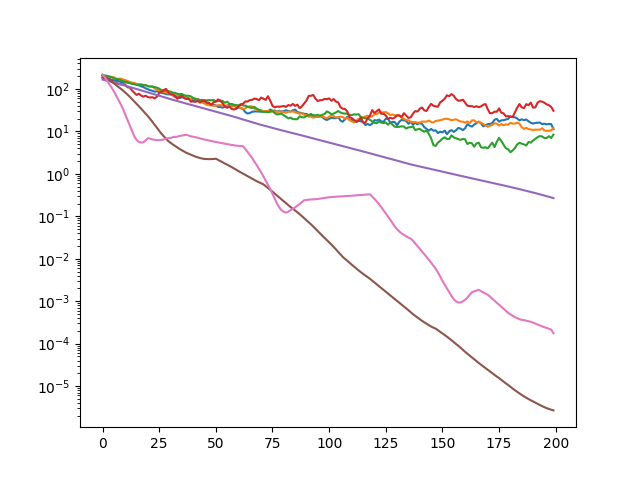

In [32]:
plt.figure()
plt.yscale("log")

In [33]:
config.optimizer = OptimizerOptions(optimizer_type = OptimizerType.QSGDA, lr=2e-2)
record = train(config)
plt.plot(record.metrics.hamiltonian)

Trying port 40850
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...


In [34]:
config.optimizer = OptimizerOptions(
    optimizer_type = OptimizerType.QSGDA, lr=2e-2,
    quantization_options=QuantizationOptions(quantization_type=QuantizationType.RANDK, k=2))
record = train(config)
plt.plot(record.metrics.hamiltonian)

Trying port 10146
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...


In [36]:
config.optimizer = OptimizerOptions(
    optimizer_type = OptimizerType.DIANA_SGDA, lr=5e-2,
    quantization_options=QuantizationOptions(quantization_type=QuantizationType.RANDK, k=2))
record = train(config)
plt.plot(record.metrics.hamiltonian)

Trying port 32858
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...


In [39]:
config.optimizer = OptimizerOptions(
    optimizer_type = OptimizerType.VR_DIANA_SGDA, lr=5e-2,
    quantization_options=QuantizationOptions(quantization_type=QuantizationType.RANDK, k=2))
record = train(config)
plt.plot(record.metrics.hamiltonian)

Trying port 31348
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
Init...
Starting...
